In [1]:
#모듈 가져오기
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

### 1.3 경기도 전체 청년창업 비율 시각화

In [2]:
data21 =pd.read_csv('연령별사업체수.csv')
data21

,지역,Total,to29,30to39,40to49,50to59,60to,비율
0,Osan,13050,409,2354,4021,4382,1884,0.211724
1,Hanam,15328,361,2403,4517,5179,2868,0.180324
2,Suwon,73441,2167,10927,21534,25602,13211,0.178293
3,Uijeongbu,27028,818,3914,8058,8797,5441,0.175078
4,Goyang,69255,1980,9943,21230,24929,11173,0.172161
5,Pyeongtaek,36133,1156,5062,10443,12699,6773,0.172086
6,Yongin,52723,1371,7448,17101,18441,8362,0.167270
7,Hwaseong,62500,1595,8810,20183,22814,9098,0.166480
8,Seongnam,65511,1621,9262,19203,22555,12870,0.166125
9,Icheon,16757,479,2277,4937,6038,3026,0.164469


In [3]:
#total행만을 가져와 전체 연령대의 청년 연령대의 사업체 비율 변수에 저장
total_data =data21.iloc[12]
total_data_b =(total_data['to29']+total_data['30to39'])*100/total_data['Total']
total_data_c =(total_data['Total']-(total_data['to29']+total_data['30to39']))*100/total_data['Total']
#파이차트에 사용할 레이블
ratio=[total_data_b,total_data_c]
labels=['young people(20~39)','others']

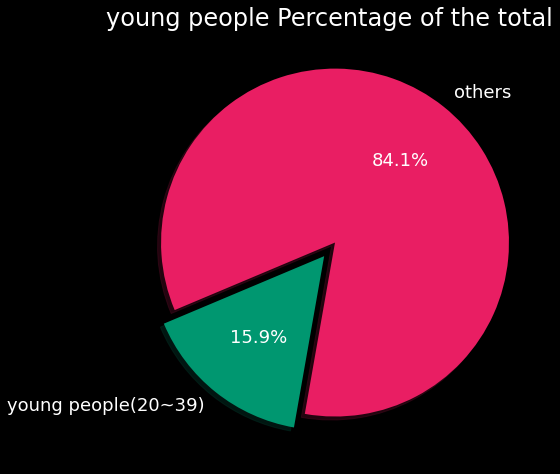

In [4]:
# 그래픽 크기 설정
plt.rcParams["figure.figsize"] = (20, 8)

#중심에서 벗어나는 정도
explode = [0.05, 0.05]

#색상
colors = ['#009770', '#E91E63']

#배경스타일
plt.style.use(['dark_background'])
c_map = plt.get_cmap('Spectral')
col = [c_map(i) for i in np.linspace(0, 1, 5)]
plt.title("young people Percentage of the total",fontsize=24)
plt.pie(ratio, colors=colors,labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, textprops={'fontsize': 18})
plt.show()

### 1.4 경기도 각 시·군·구별 청년사업체 비율 시각화

In [5]:
#total행을 제외한 테이블 생성
plt.figure(2)
data21 = data21.drop(index=12)
data21= data21.reset_index()

<Figure size 1440x576 with 0 Axes>

In [6]:
#데이터를 모두 숫자로 변환
data21['Total']=pd.to_numeric(data21['Total'])
data21['to29']=pd.to_numeric(data21['to29'])
data21['30to39']=pd.to_numeric(data21['30to39'])

In [7]:
#밑에 for문에 쓸 인덱스 열 생성
x= list(range(31))
data21['index']=x

In [8]:
#a는 y축 , b는 청년 사업체 비율, c는 나머지 연령대 사업체 비율, d는 for문에 사용하려고 만듬
a =data21['지역']
b =(data21['to29']+data21['30to39'])*100/data21['Total']
c =(data21['Total']-(data21['to29']+data21['30to39']))*100/data21['Total']
d= data21['index']
data21

,index,지역,Total,to29,30to39,40to49,50to59,60to,비율
0,0,Osan,13050,409,2354,4021,4382,1884,0.211724
1,1,Hanam,15328,361,2403,4517,5179,2868,0.180324
2,2,Suwon,73441,2167,10927,21534,25602,13211,0.178293
3,3,Uijeongbu,27028,818,3914,8058,8797,5441,0.175078
4,4,Goyang,69255,1980,9943,21230,24929,11173,0.172161
5,5,Pyeongtaek,36133,1156,5062,10443,12699,6773,0.172086
6,6,Yongin,52723,1371,7448,17101,18441,8362,0.167270
7,7,Hwaseong,62500,1595,8810,20183,22814,9098,0.166480
8,8,Seongnam,65511,1621,9262,19203,22555,12870,0.166125
9,9,Icheon,16757,479,2277,4937,6038,3026,0.164469


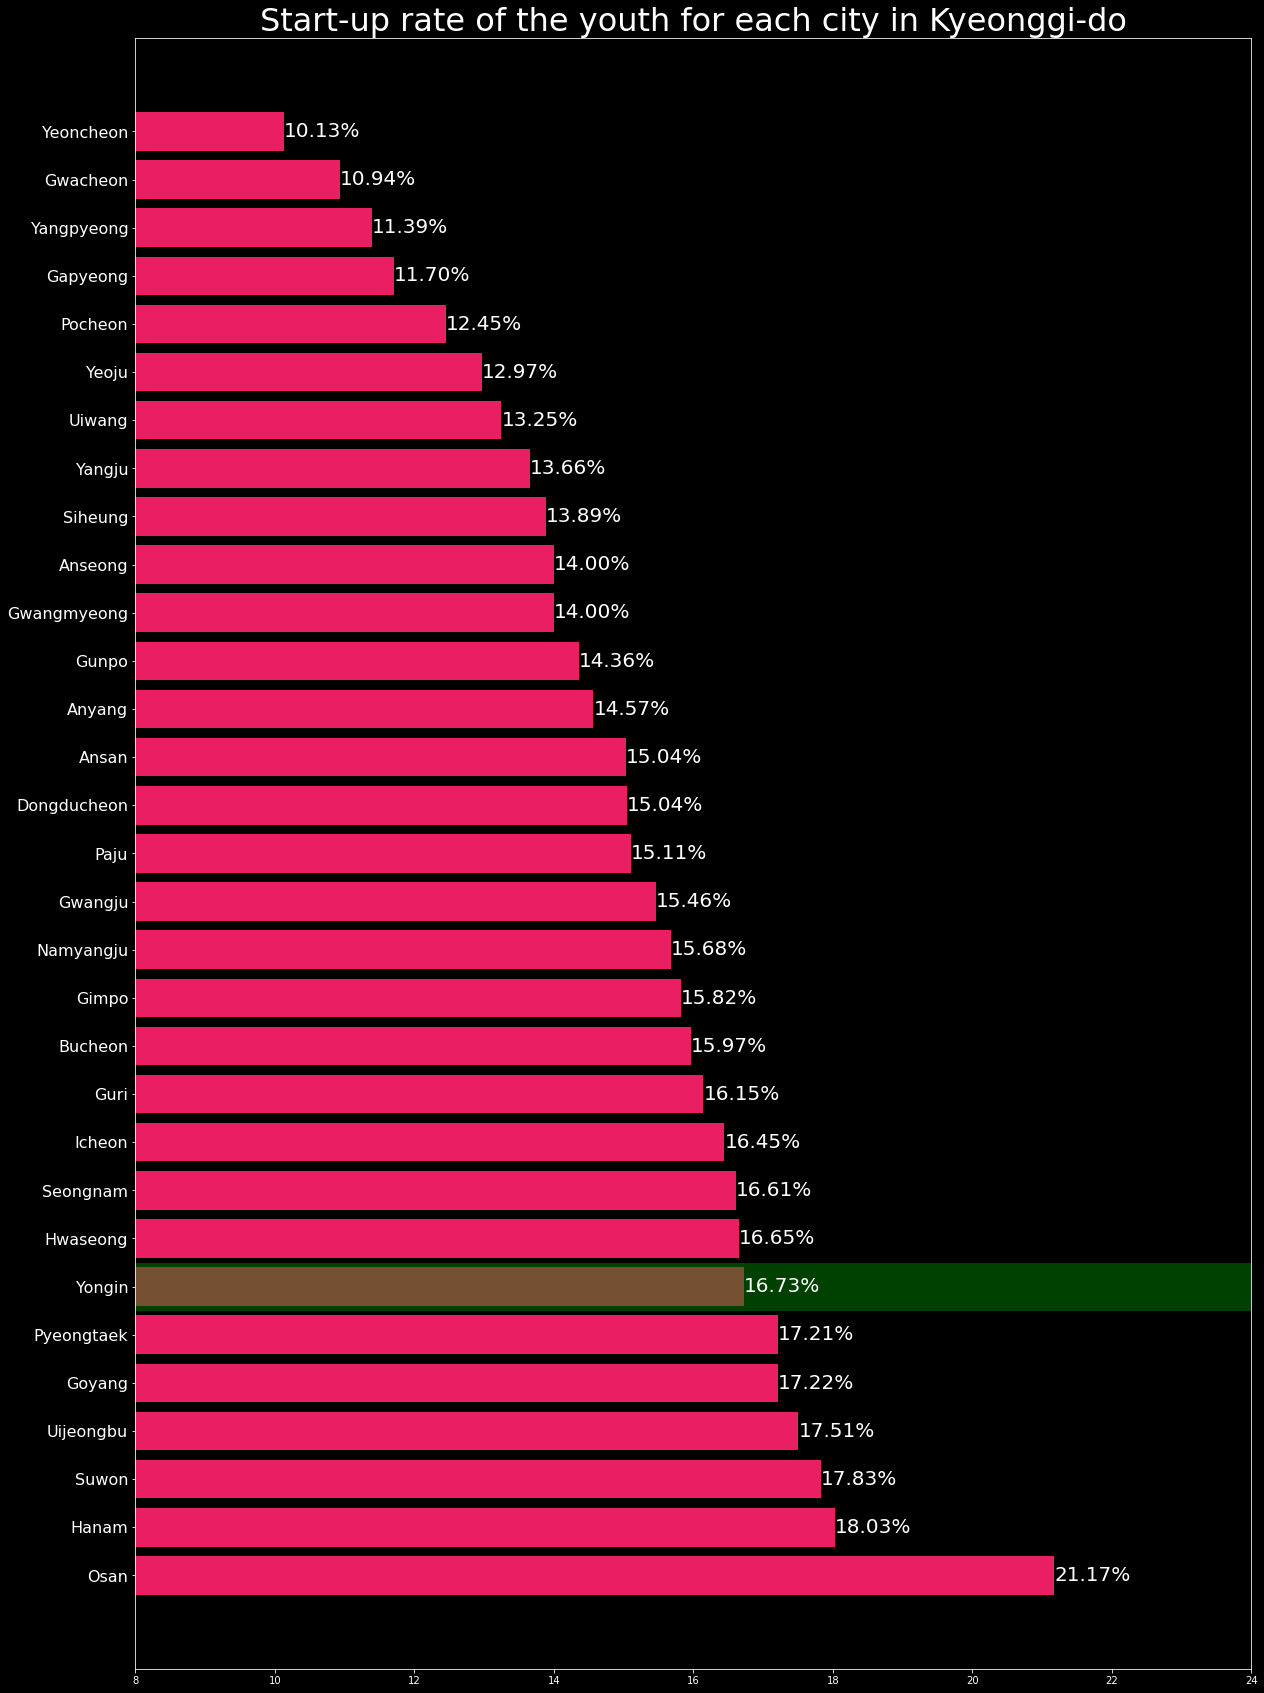

In [11]:
#그림그리기
plt.rcParams['figure.figsize'] = [20, 30]
plt.barh(a,b,color='#E91E63')
plt.yticks(fontsize=16)
plt.xlim(8,24)
plt.style.use(['dark_background'])
plt.title("Start-up rate of the youth for each city in Kyeonggi-do",fontsize=32)

#텍스트 입력
for i, v in enumerate(d):
    str_val="%0.2f%%" % b[i]
    plt.text(b[i],v,str_val,fontsize=20,color='white',
             horizontalalignment='left',verticalalignment ='center')
#강조표시     
plt.axhspan(5.5, 6.5, facecolor='green',alpha =0.5)